# **A1 Team2 Project M4**
Team members:Tzu-Chun Chen

Topic: European Drug Development

## **1. Data Preview & Cleaning**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [7]:
# import data
data = pd.read_csv('drugs.csv')
data.head()

,category,medicine_name,therapeutic_area,common_name,active_substance,product_number,patient_safety,authorisation_status,atc_code,additional_monitoring,...,marketing_authorisation_holder_company_name,pharmacotherapeutic_group,date_of_opinion,decision_date,revision_number,condition_indication,species,first_published,revision_date,url
0,human,Adcetris,"Lymphoma, Non-Hodgkin; Hodgkin Disease",brentuximab vedotin,brentuximab vedotin,2455,False,authorised,L01XC12,False,...,Takeda Pharma A/S,Antineoplastic agents,2012-07-19,2022-11-17,34.0,Hodgkin lymphomaAdcetris is indicated for adul...,NaN,2018-07-25T13:58:00Z,2023-03-13T11:52:00Z,https://www.ema.europa.eu/en/medicines/human/E...
1,human,Nityr,Tyrosinemias,nitisinone,nitisinone,4582,False,authorised,A16AX04,False,...,Cycle Pharmaceuticals (Europe) Ltd,"Other alimentary tract and metabolism products,",2018-05-31,2023-03-10,4.0,Treatment of adult and paediatric patients wit...,NaN,2018-07-26T14:20:00Z,2023-03-10T17:29:00Z,https://www.ema.europa.eu/en/medicines/human/E...
2,human,Ebvallo,Lymphoproliferative Disorders,tabelecleucel,tabelecleucel,4577,False,authorised,NaN,True,...,Pierre Fabre Medicament,NaN,2022-10-13,2023-03-09,2.0,Ebvallo is indicated as monotherapy for treatm...,NaN,2022-10-12T16:13:00Z,2023-03-10T13:40:00Z,https://www.ema.europa.eu/en/medicines/human/E...
3,human,Ronapreve,COVID-19 virus infection,"casirivimab, imdevimab","casirivimab, imdevimab",5814,False,authorised,J06BD,True,...,Roche Registration GmbH,"Immune sera and immunoglobulins,",2021-11-11,2023-02-24,3.0,Ronapreve is indicated for:Treatment of COVID-...,NaN,2021-11-12T16:30:00Z,2023-03-10T12:29:00Z,https://www.ema.europa.eu/en/medicines/human/E...
4,human,Cosentyx,"Arthritis, Psoriatic; Psoriasis; Spondylitis...",secukinumab,secukinumab,3729,False,authorised,L04AC10,False,...,Novartis Europharm Limited,Immunosuppressants,2014-11-20,2023-01-26,30.0,Plaque psoriasisCosentyx is indicated for the ...,NaN,2018-06-07T11:59:00Z,2023-03-09T18:53:00Z,https://www.ema.europa.eu/en/medicines/human/E...


In [8]:
data.nunique()

,0
category,2
medicine_name,1976
therapeutic_area,669
common_name,1261
active_substance,1345
product_number,1932
patient_safety,2
authorisation_status,3
atc_code,1074
additional_monitoring,2


In [9]:
# Split into human and veterinary data
data_human = data[data['category'] == 'human']
data_vet = data[data['category'] == 'veterinary']
print(f"Human: {data_human.shape}")
print(f"Veterinary: {data_vet.shape}")

Human: (1706, 28)
Veterinary: (282, 28)


In [10]:
# clean human data
data_human.isnull().sum()

,0
category,0
medicine_name,0
therapeutic_area,3
common_name,2
active_substance,1
product_number,0
patient_safety,0
authorisation_status,1
atc_code,25
additional_monitoring,0


In [11]:
# Drop columns
data_human = data_human.drop(['category', 'species', 'url', 'product_number'], axis=1)

In [12]:
# Add "admin_time_days" column
data_human['admin_time_days'] = (
    pd.to_datetime(data_human['marketing_authorisation_date'], errors='coerce') -
    pd.to_datetime(data_human['date_of_opinion'], errors='coerce')
).dt.days

data_human.head(3)

,medicine_name,therapeutic_area,common_name,active_substance,patient_safety,authorisation_status,atc_code,additional_monitoring,generic,biosimilar,...,date_of_refusal_of_marketing_authorisation,marketing_authorisation_holder_company_name,pharmacotherapeutic_group,date_of_opinion,decision_date,revision_number,condition_indication,first_published,revision_date,admin_time_days
0,Adcetris,"Lymphoma, Non-Hodgkin; Hodgkin Disease",brentuximab vedotin,brentuximab vedotin,False,authorised,L01XC12,False,False,False,...,NaN,Takeda Pharma A/S,Antineoplastic agents,2012-07-19,2022-11-17,34.0,Hodgkin lymphomaAdcetris is indicated for adul...,2018-07-25T13:58:00Z,2023-03-13T11:52:00Z,98.0
1,Nityr,Tyrosinemias,nitisinone,nitisinone,False,authorised,A16AX04,False,True,False,...,NaN,Cycle Pharmaceuticals (Europe) Ltd,"Other alimentary tract and metabolism products,",2018-05-31,2023-03-10,4.0,Treatment of adult and paediatric patients wit...,2018-07-26T14:20:00Z,2023-03-10T17:29:00Z,56.0
2,Ebvallo,Lymphoproliferative Disorders,tabelecleucel,tabelecleucel,False,authorised,NaN,True,False,False,...,NaN,Pierre Fabre Medicament,NaN,2022-10-13,2023-03-09,2.0,Ebvallo is indicated as monotherapy for treatm...,2022-10-12T16:13:00Z,2023-03-10T13:40:00Z,64.0


In [13]:
data_human.nunique()

,0
medicine_name,1695
therapeutic_area,669
common_name,1039
active_substance,1115
patient_safety,2
authorisation_status,3
atc_code,893
additional_monitoring,2
generic,2
biosimilar,2


## **2. NLP Clustering with Sentence-BERT**

In [22]:
# text preparation
data_human['condition_indication'] = data_human['condition_indication'].fillna('').astype(str)

# Keep rows with valid text and valid time calculation
data_human_clean = data_human[data_human['condition_indication'] != ''].dropna(subset=['admin_time_days']).copy()

In [23]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
print("Loading Sentence-BERT model...")
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')

print("Encoding medical indications into semantic vectors...")
nlp_embeddings = embedding_model.encode(data_human_clean['condition_indication'].tolist(), show_progress_bar=True)

print(f"✅ Vectorization complete! Embedding shape: {nlp_embeddings.shape}")

Loading Sentence-BERT model...


Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Encoding medical indications into semantic vectors...


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

✅ Vectorization complete! Embedding shape: (1016, 384)


In [24]:
import umap

print("Reducing 384D BERT embeddings to 2D using UMAP...")
# Set UMAP parameters (n_neighbors can be tuned based on your dataset size, 15 is a standard starting point)
umap_reducer = umap.UMAP(n_neighbors=15, n_components=2, metric='cosine', random_state=42)
umap_nlp_embeddings = umap_reducer.fit_transform(nlp_embeddings)

# Save the UMAP 2D coordinates back to the dataframe for plotting later
data_human_clean['umap_nlp_x'] = umap_nlp_embeddings[:, 0]
data_human_clean['umap_nlp_y'] = umap_nlp_embeddings[:, 1]

print("✅ UMAP dimensionality reduction complete!")

Reducing 384D BERT embeddings to 2D using UMAP...
✅ UMAP dimensionality reduction complete!


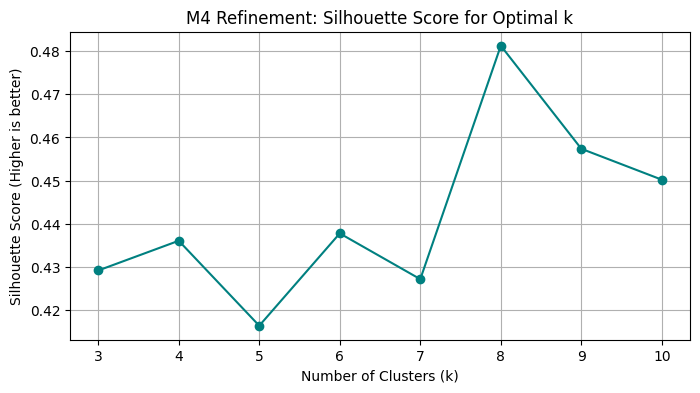

✅ Based on the rigorous Silhouette Score, the optimal number of clusters is: 8


In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_range = range(3, 11)
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Perform clustering on the UMAP-reduced embeddings
    labels = kmeans.fit_predict(umap_nlp_embeddings)
    score = silhouette_score(umap_nlp_embeddings, labels)
    silhouette_scores.append(score)

# Plot the evaluation metric
plt.figure(figsize=(8, 4))
plt.plot(k_range, silhouette_scores, marker='o', color='teal')
plt.title('M4 Refinement: Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score (Higher is better)')
plt.grid(True)
plt.show()

# Automatically identify the best k with the highest silhouette score
best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"✅ Based on the rigorous Silhouette Score, the optimal number of clusters is: {best_k}")

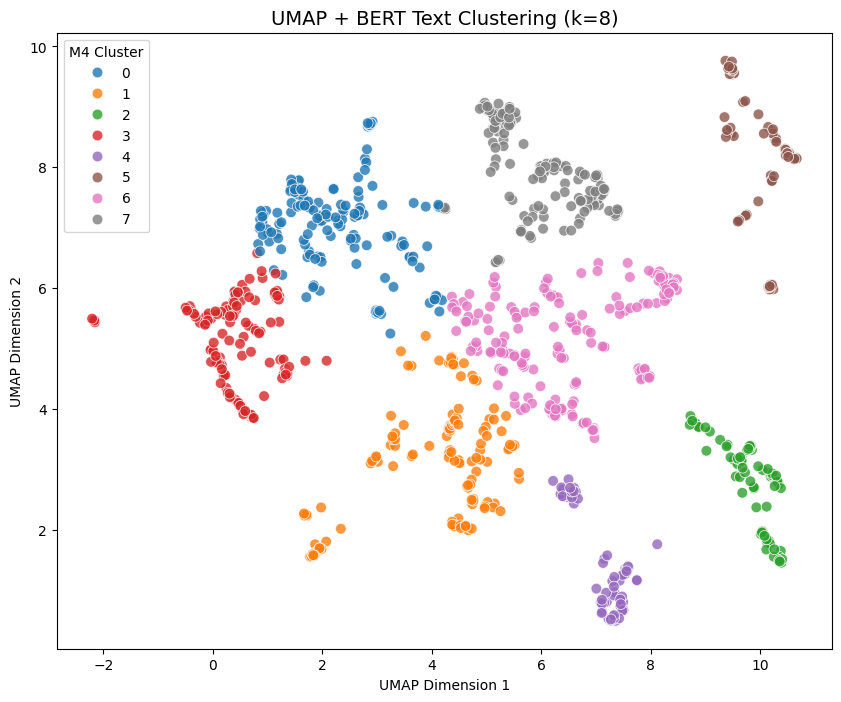

In [26]:
# Perform final clustering using the optimal K value
final_kmeans = KMeans(n_clusters=best_k, random_state=42)
data_human_clean['m4_nlp_cluster'] = final_kmeans.fit_predict(umap_nlp_embeddings)

# Plot the elegant UMAP semantic clustering scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='umap_nlp_x', y='umap_nlp_y',
    hue='m4_nlp_cluster',
    palette='tab10',
    data=data_human_clean,
    s=60, alpha=0.8, edgecolor='w'
)
plt.title(f'UMAP + BERT Text Clustering (k={best_k})', fontsize=14)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(title='M4 Cluster')
plt.show()

### To project the 384-dimensional BERT embeddings into a 2D space for clustering, we needed to optimize the UMAP n_neighbors parameter, which controls the balance between local and global data structures.

Running UMAP with n_neighbors=5...
Running UMAP with n_neighbors=15...
Running UMAP with n_neighbors=30...


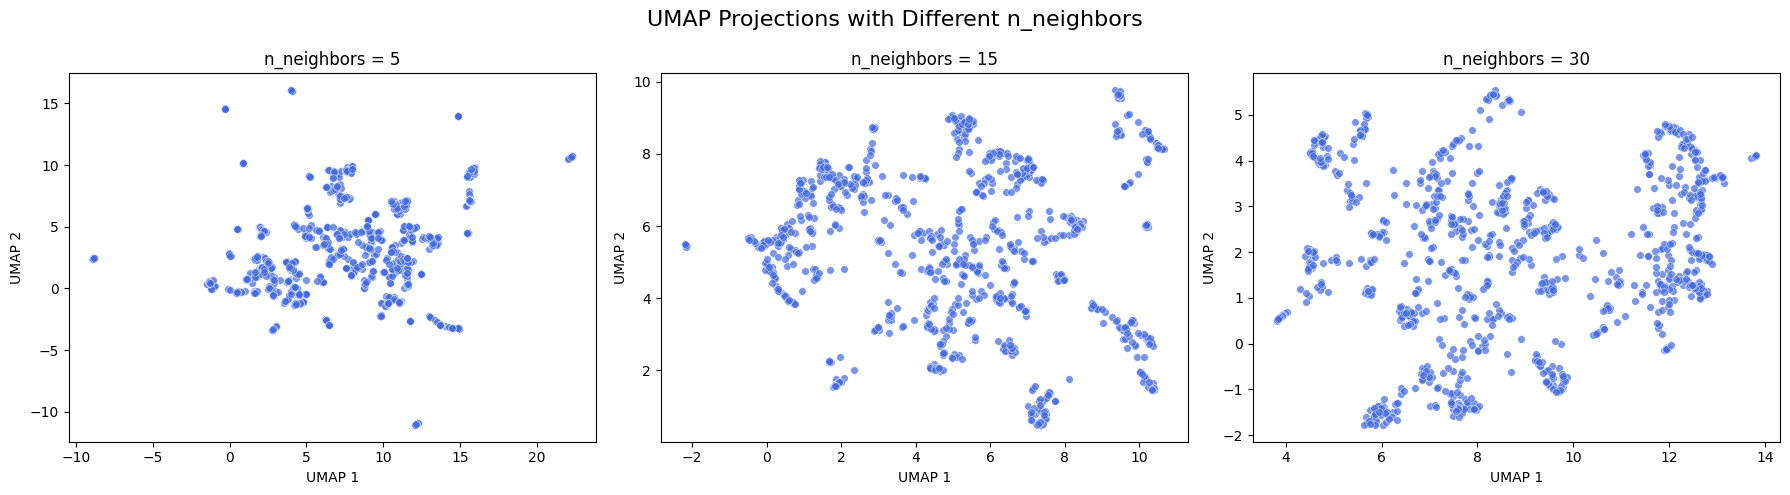

In [27]:
# --- Experiment 1: Tuning UMAP n_neighbors ---
import umap
import matplotlib.pyplot as plt
import seaborn as sns

neighbors_to_test = [5, 15, 30]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('UMAP Projections with Different n_neighbors', fontsize=16)

for i, n in enumerate(neighbors_to_test):
    print(f"Running UMAP with n_neighbors={n}...")
    reducer = umap.UMAP(n_neighbors=n, n_components=2, metric='cosine', random_state=42)
    embedding_test = reducer.fit_transform(nlp_embeddings)

    sns.scatterplot(
        x=embedding_test[:, 0], y=embedding_test[:, 1],
        ax=axes[i], s=30, alpha=0.7, edgecolor='w', color='royalblue'
    )
    axes[i].set_title(f'n_neighbors = {n}')
    axes[i].set_xlabel('UMAP 1')
    axes[i].set_ylabel('UMAP 2')

plt.tight_layout()
plt.show()

### Observations & Justification: At a lower value (n_neighbors = 5), the projection heavily prioritizes local structure, resulting in highly fragmented, isolated micro-clusters. At a higher value (n_neighbors = 30), the projection captures more global structure, blending distinct therapeutic areas into larger, less separable blobs. Conclusion: We selected n_neighbors = 15   as the optimal hyperparameter. It provides the best trade-off, preserving distinct, dense therapeutic neighborhoods while maintaining the overall global relationships between different disease categories.

### While the Silhouette Score provides a mathematical recommendation for the number of clusters ($k$), relying solely on mathematical metrics can sometimes lead to categories that lack business or medical interpretability. Therefore, we visually evaluated different $k$ values ($k=4, 6, 8$) mapped onto our optimized UMAP space.

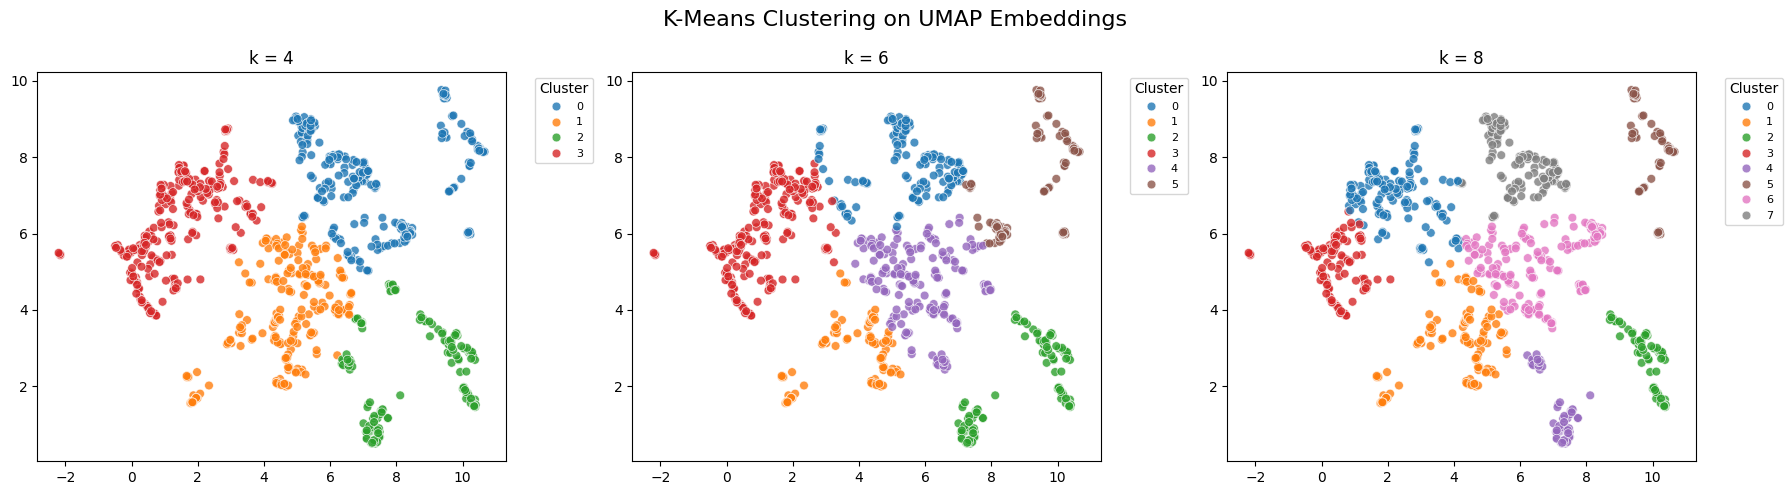

In [31]:
# --- Experiment 2: Visualizing Different K values ---
from sklearn.cluster import KMeans

best_n_neighbors = 15
final_umap_reducer = umap.UMAP(n_neighbors=best_n_neighbors, n_components=2, metric='cosine', random_state=42)
final_umap_embeddings = final_umap_reducer.fit_transform(nlp_embeddings)


k_to_test = [4, 6, 8]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('K-Means Clustering on UMAP Embeddings', fontsize=16)

for i, k in enumerate(k_to_test):
    kmeans_test = KMeans(n_clusters=k, random_state=42)
    labels = kmeans_test.fit_predict(final_umap_embeddings)

    sns.scatterplot(
        x=final_umap_embeddings[:, 0], y=final_umap_embeddings[:, 1],
        hue=labels, palette='tab10',
        ax=axes[i], s=40, alpha=0.8, edgecolor='w'
    )
    axes[i].set_title(f'k = {k}')
    axes[i].legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 8})

plt.tight_layout()
plt.show()

### At $k=4$, the clustering is too broad, artificially forcing distinct therapeutic domains (e.g., Oncology and Rare Genetic Disorders) into the same category.

In [33]:
from collections import Counter
import re

print("=== Profiling the 8 Clusters Generated by Sentence-BERT ===")

# Analyze each cluster iteratively (e.g., from 0 to 7)
for cluster_id in sorted(data_human_clean['m4_nlp_cluster'].unique()):
    # Extract all drugs belonging to the current cluster
    cluster_data = data_human_clean[data_human_clean['m4_nlp_cluster'] == cluster_id]

    print(f"\n🟢 Cluster {cluster_id} (Total Drugs: {len(cluster_data)})")

    # 1. Randomly sample 5 drug names to understand the clinical context
    drug_col = 'common_name' if 'common_name' in cluster_data.columns else 'medicine_name'
    sample_drugs = cluster_data[drug_col].dropna().sample(min(5, len(cluster_data)), random_state=42).tolist()
    print(f"   Sample Drugs: {', '.join(sample_drugs)}")

    # 2. Extract top keywords from indications (excluding short words and standard stopwords)
    all_text = " ".join(cluster_data['condition_indication'].tolist()).lower()
    words = re.findall(r'\b[a-z]{4,}\b', all_text) # Extract words with 4 or more characters

    # Filter out common, non-informative medical stopwords
    stopwords = {'treatment', 'patients', 'with', 'that', 'from', 'this', 'indicated', 'disease', 'used'}
    meaningful_words = [w for w in words if w not in stopwords]

    # Identify the top 5 most frequent meaningful words
    top_words = [word for word, count in Counter(meaningful_words).most_common(5)]
    print(f"   Top Keywords: {', '.join(top_words)}")

    # 3. Calculate the average administrative approval time for the cluster
    avg_time = cluster_data['admin_time_days'].mean()
    print(f"   Avg Admin Time: {avg_time:.1f} days")

=== Profiling the 8 Clusters Generated by Sentence-BERT ===

🟢 Cluster 0 (Total Drugs: 165)
   Sample Drugs: filgrastim, mogamulizumab, bexarotene, epoetin zeta, azacitidine
   Top Keywords: adult, combination, therapy, cell, chemotherapy
   Avg Admin Time: 52.8 days

🟢 Cluster 1 (Total Drugs: 144)
   Sample Drugs: brexpiprazole, pregabalin, hydrocortisone, levetiracetam, lidocaine, prilocaine
   Top Keywords: adults, years, seizures, women, adult
   Avg Admin Time: 29.6 days

🟢 Cluster 2 (Total Drugs: 85)
   Sample Drugs: insulin human (rdna), dapagliflozin, fenofibrate, simvastatin, sitagliptin fumarate, glucagon
   Top Keywords: metformin, diet, diabetes, glycaemic, control
   Avg Admin Time: 74.0 days

🟢 Cluster 3 (Total Drugs: 136)
   Sample Drugs: trastuzumab, enfortumab vedotin, crizotinib, fluciclovine (18f), yttrium [90y] chloride
   Top Keywords: cancer, metastatic, combination, adult, cell
   Avg Admin Time: 75.4 days

🟢 Cluster 4 (Total Drugs: 75)
   Sample Drugs: tildrakiz

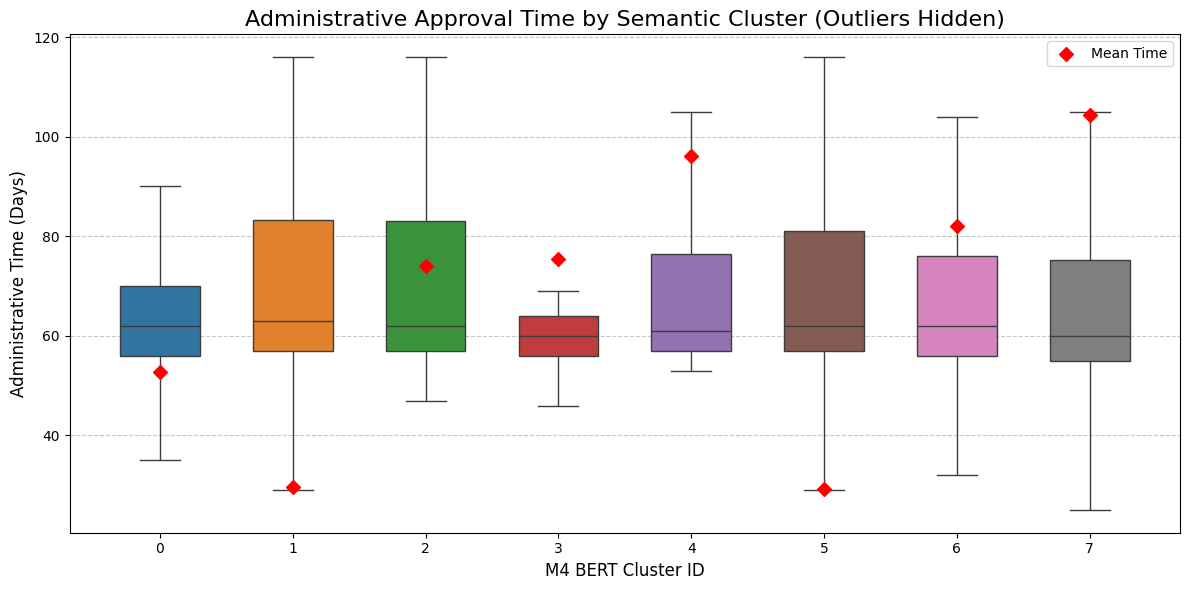

In [35]:
plt.figure(figsize=(12, 6))

# Create a boxplot to show the distribution of approval times for each cluster
# 'showfliers=False' is used to hide extreme outliers for a cleaner, more readable view
sns.boxplot(
    x='m4_nlp_cluster',
    y='admin_time_days',
    data=data_human_clean,
    palette='tab10',
    showfliers=False,
    width=0.6
)

# Overlay the Mean values as red diamonds for clear comparison with medians
means = data_human_clean.groupby('m4_nlp_cluster')['admin_time_days'].mean()
plt.scatter(
    x=means.index,
    y=means.values,
    color='red',
    marker='D',
    s=50,
    label='Mean Time',
    zorder=5
)

# Add professional titles and labels
plt.title('Administrative Approval Time by Semantic Cluster (Outliers Hidden)', fontsize=16)
plt.xlabel('M4 BERT Cluster ID', fontsize=12)
plt.ylabel('Administrative Time (Days)', fontsize=12)

# Add legend and grid for better readability
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()